# Method: Free Energy Minimization

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/danhtaihoang/network-inference/master?filepath=sphinx%2Fcodesource%2Ffem.ipynb)

A detail description of this method can be found in our paper. Briefly, we defined a free energy of data, and showed that minimizing this free energy leads to an effective estimation of interactions. Our method's algorithm contains the following steps:

(i) Initialize $W_{ij}$ at random;

(ii) Compute the local field $H_i(t) = \sum_j W_{ij} \sigma_j (t)$;

(iii) Compute the data energy $$E_i(t) =  {{\sigma_i(t+1)} \over {\langle  \sigma(t+1) \rangle_{\text{model}}}}  H_i(t), $$ where $\langle  \sigma(t+1) \rangle_{\text{model}}$ represents model expectation;

(iv) Extract couplings $W_{ij}^\text{new}= \sum_k \langle \delta E_i \delta \sigma_k  \rangle [C^{-1}]_{kj}$, where  $\langle \cdot \rangle$ represents the sample mean,  $\delta f \equiv f -\langle f\rangle$ and $C_{jk} \equiv \langle \delta\sigma_j\delta\sigma_k\rangle$;

(v) Repeat (ii)-(iv) until the discrepancy between observed $\sigma_i(t+1)$ and model expectation 
$\langle  \sigma(t+1) \rangle_{\text{model}}$, $D_i(W) = \sum_{t} \big[ \sigma_i(t+1) - \langle \sigma_i(t+1) \rangle_{\text{model}} \big]^2$  starts to increase;

(vi) Perform (ii)-(v) in parallel for every variable index $i \in \{1, 2, \cdots, N\}.$

In the following, we will test the performance of FEM in inferring couplings $W_{ij}$ from binary data ($\sigma_i(t)=\pm1$) that are generated from the kinetic Ising model. We will show that our method works well even in the difficult regimes of small sample sizes and large coupling variability.

First of all, we import the necessary packages to the jupyter notebook:

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import simulate
import inference
%matplotlib inline

np.random.seed(1)

Suppose that the actual couplings are normally distributed with zero mean and standard deviation equal to $g/\sqrt N$ (known as the Sherrington-Kirkpatrick model).

## Small coupling variability $(g = 2)$

We start by considering a system of $N = 100$ variables, and coupling variability parameter $g = 2.0.$

In [2]:
# parameter setting:
n = 100    # number of variables
g = 2.0    # coupling variability parameter

w0 = np.random.normal(0.0,g/np.sqrt(n),size=(n,n))

The heat map of the actual coupling matrix `w0` is plotted:

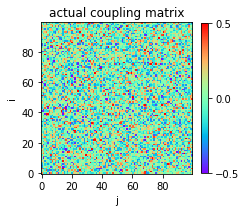

In [3]:
plt.figure(figsize=(3,3))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])
plt.show()

Using the function `simulate.generate_data`, we then generate a time series of variable states according to the kinetic Ising model with a data length $L = 2000$.

In [4]:
l = 2000
s = simulate.generate_data(w0,l)

A raster of variable configurations `s` is plotted:

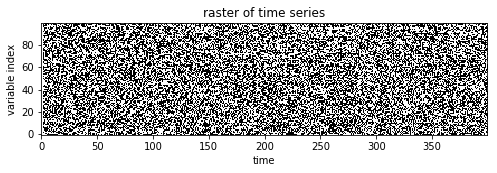

In [5]:
plt.figure(figsize=(8,3))
plt.title('raster of time series')
plt.imshow(s.T[:,:400],cmap='gray',origin='lower')
plt.xlabel('time')
plt.ylabel('variable index')
plt.show()

Now, we recover the coupling matrix from the time series.

In [6]:
w = inference.fem(s)

We plot the heat map of predicted coupling matrix `w` and compare with the actual couplings `w0`:

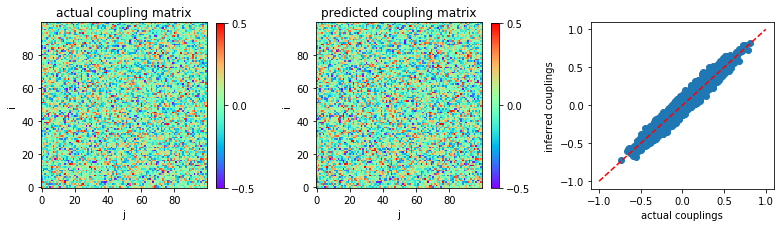

In [7]:
plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,1))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,2))
plt.plot([-1,1],[-1,1],'r--')
plt.scatter(w0,w)
plt.xlabel('actual couplings')
plt.ylabel('inferred couplings')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

The inference accuracy is measured by mean square error between actual couplings and inferred couplings: MSE = $\frac{1}{N^{2}} \sum_{i,j=1}^N (W_{ij} - W_{ij}^{\text{actual}})$ 

In [8]:
MSE = np.mean((w-w0)**2)
print('MSE:',MSE)

('MSE:', 0.0022213611848090785)


# new algorithm

In [10]:
w = inference.fem_test(s)

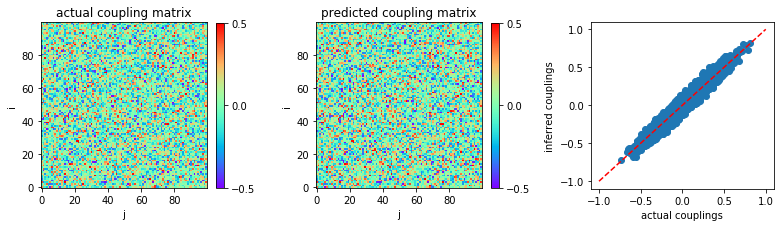

In [11]:
plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,1))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,2))
plt.plot([-1,1],[-1,1],'r--')
plt.scatter(w0,w)
plt.xlabel('actual couplings')
plt.ylabel('inferred couplings')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

In [12]:
MSE = np.mean((w-w0)**2)
print('MSE:',MSE)

('MSE:', 0.0022240667430084896)
